## Analise das notas do Enem de 2023 (dados fictícios)
Você é uma pesquisadora de um cursinho para estudantes que querem
ingressar na universidade em 2025. Seu objetivo é retirar informações da base
de dados do enem do ano anterior para alinhar melhor as estratégias do
cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam
as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No
dado existe a representação de 1000 pessoas, sendo cada uma delas uma
linha.


In [ ]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Leitura do dataframe e visualização das primeiras linhas desse
file_path = '/content/drive/MyDrive/enem_2023.json'
df_enem = pd.read_json(file_path)
df_enem.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


In [ ]:
#verficando se há dados nulos
df_enem.isna().sum()

,0
Linguagens,103
Ciências humanas,64
Ciências da natureza,176
Matemática,76
Redação,140
Sexo,0


In [ ]:
df_enem.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


## Exercicio 1
Qual das disciplinas tem a maior amplitude de nota?

In [ ]:
#separando todas as linhas das colunas selecionadas
amplitude = df_enem.iloc[:, 0:5].max() - df_enem.iloc[:, 0:5].min()
#usando tabulate para melhor visualização dos dados
df_amplitude = amplitude.reset_index()
df_amplitude.columns = ['Disciplina', 'Amplitude']
print(tabulate(df_amplitude, headers='keys', tablefmt='fancy_grid', showindex = False, floatfmt='.2f'))
#Maior amplitude entre as disciplinas
print(f'A disciplina com maior amplitude é: {amplitude.idxmax()}')

╒══════════════════════╤═════════════╕
│ Disciplina           │   Amplitude │
╞══════════════════════╪═════════════╡
│ Linguagens           │      517.46 │
├──────────────────────┼─────────────┤
│ Ciências humanas     │      474.02 │
├──────────────────────┼─────────────┤
│ Ciências da natureza │      487.60 │
├──────────────────────┼─────────────┤
│ Matemática           │      488.08 │
├──────────────────────┼─────────────┤
│ Redação              │      729.16 │
╘══════════════════════╧═════════════╛
A disciplina com maior amplitude é: Redação


## Exercicio 2
Qual é a média e a
mediana para cada uma das disciplinas? (Lembre-se de remover todos os
valores nulos quando considerar a mediana)


In [ ]:
#definindo lista de disciplinas para o loop
disciplinas = ['Linguagens',
               'Ciências humanas',
               'Ciências da natureza',
               'Matemática',
               'Redação']

for disciplina in disciplinas:
  notas = df_enem[disciplina].dropna()
  media = notas.mean()
  mediana = notas.median()
  print(f'\nMédia de {disciplina}: {media}')
  print(f'Mediana {disciplina}: {mediana}')


Média de Linguagens: 514.5248092106333
Mediana Linguagens: 515.0452497632

Média de Ciências humanas: 527.0422808644046
Mediana Ciências humanas: 524.51992005745

Média de Ciências da natureza: 499.3155828489797
Mediana Ciências da natureza: 500.47926306565

Média de Matemática: 535.9656600928729
Mediana Matemática: 533.2477669785001

Média de Redação: 637.7835320695873
Mediana Redação: 635.27397319435


## Exercicio 3
Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?


In [ ]:
#definindo os pesos para cada disciplina
pesos = pd.Series({
    'Redação': 2,
    'Matemática': 4,
    'Linguagens': 2,
    'Ciências humanas': 1,
    'Ciências da natureza' : 1
})
#calculando a nota ponderada para cada estudante
df_ponderada = df_enem.dropna(subset=pesos.index)
notas = df_ponderada.loc[:, pesos.index]  # Seleção explícita com loc
# Use np.sum to explicitly call the NumPy sum function
df_ponderada['Nota Ponderada'] = (notas * pesos).sum(axis=1) / np.sum(pesos.values)

#selecionando os 500 maiores valores
top_500_estudantes = df_ponderada.nlargest(500, 'Nota Ponderada')

#calculando a media e a variancia
media = top_500_estudantes['Nota Ponderada'].mean()
dsv = top_500_estudantes['Nota Ponderada'].std()

#Exibindo valores do maior para o menor
top_500_estudantes = top_500_estudantes.sort_values(by='Nota Ponderada', ascending=False)

#Exibindo a tabela com tabulate para melhor visualização
print(tabulate(top_500_estudantes[['Nota Ponderada']].head(10).round(2), headers='keys', tablefmt='fancy_grid'))

print(f"\nMédia das notas ponderadas dos melhores 500 estudantes: {media:.2f}")
print(f'O desvio padrão das notas ponderadas dos melhores 500 estudantes: {dsv:.2f}')
print('\n')

╒═════╤══════════════════╕
│     │   Nota Ponderada │
╞═════╪══════════════════╡
│  25 │           682.99 │
├─────┼──────────────────┤
│ 824 │           680.1  │
├─────┼──────────────────┤
│ 702 │           671.27 │
├─────┼──────────────────┤
│ 129 │           664.38 │
├─────┼──────────────────┤
│  60 │           658.6  │
├─────┼──────────────────┤
│ 880 │           658.56 │
├─────┼──────────────────┤
│ 376 │           657.8  │
├─────┼──────────────────┤
│ 989 │           648.02 │
├─────┼──────────────────┤
│ 694 │           646.94 │
├─────┼──────────────────┤
│ 965 │           645.62 │
╘═════╧══════════════════╛

Média das notas ponderadas dos melhores 500 estudantes: 557.29
O desvio padrão das notas ponderadas dos melhores 500 estudantes: 40.44




<ipython-input-42-84d9d5a1d03b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ponderada['Nota Ponderada'] = (notas * pesos).sum(axis=1) / np.sum(pesos.values)


In [ ]:
#outra alternativa
media = top_500_estudantes.select_dtypes(include = np.number).mean()
dsv = top_500_estudantes.select_dtypes(include = np.number).std()
print(f'Média das notas ponderadas dos melhores 500 estudantes: \n{media}')
print(f'O desvio padrão das notas ponderadas dos melhores 500 estudantes: \n{dsv}')

Média das notas ponderadas dos melhores 500 estudantes: 
Linguagens              522.839398
Ciências humanas        529.920191
Ciências da natureza    503.086728
Matemática              547.407965
Redação                 652.289598
Nota Ponderada          557.289677
dtype: float64
O desvio padrão das notas ponderadas dos melhores 500 estudantes: 
Linguagens               80.774298
Ciências humanas         77.131378
Ciências da natureza     78.613174
Matemática               83.240776
Redação                 109.963819
Nota Ponderada           40.435866
dtype: float64


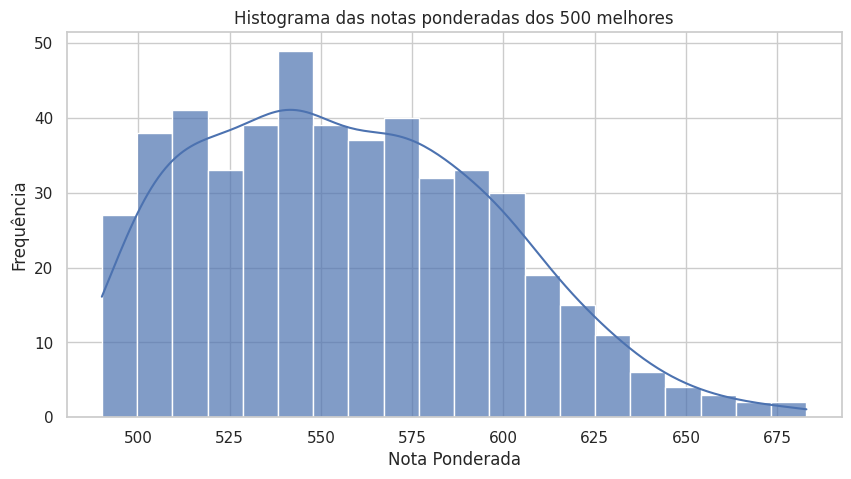

In [ ]:
sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 5))
sns.histplot(top_500_estudantes['Nota Ponderada'], bins=20,alpha = 0.7, kde=True)
plt.title('Histograma das notas ponderadas dos 500 melhores')
plt.xlabel('Nota Ponderada')
plt.ylabel('Frequência')
plt.show()

## Exercicio 4
Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
#selecionando os 40 aprovados dos 500 melhores
aprovados_40 = top_500_estudantes.nlargest(40, 'Nota Ponderada')
#calculando a media e a variancia
media_aprovados = aprovados_40['Nota Ponderada'].mean()
variancia_aprovados = aprovados_40['Nota Ponderada'].var()

print(f'Média dos 40 aprovados: {media_aprovados:.2f}')
print(f'Variância dos 40 aprovados: {variancia_aprovados:.2f}')

Média dos 40 aprovados: 636.68
Variância dos 40 aprovados: 295.77


## Exercicio 5
Qual o valor do teto do terceiro quartil para as disciplinas de matemática
e linguagens?

O teto do 3° quartil para Linguagens é: 571.96
O teto do 3° quartil para Matemática é: 591.68


Text(0, 0.5, 'Notas')

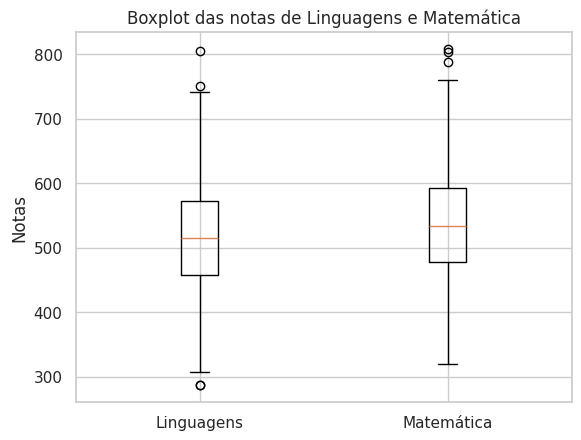

In [ ]:
#Filtrando disciplinas pedidas
disciplinas_filtradas = ['Linguagens', 'Matemática']
dados = df_enem[disciplinas_filtradas].dropna()

#calculando o 3° quartil, valor abaixo do qual 75% dos dados se encontram
q3_lin = dados['Linguagens'].quantile(0.75)
q3_math = dados['Matemática'].quantile(0.75)

print(f'O teto do 3° quartil para Linguagens é: {q3_lin:.2f}')
print(f'O teto do 3° quartil para Matemática é: {q3_math:.2f}')

#boxplot
fig, ax = plt.subplots()
ax.boxplot([dados['Linguagens'], dados['Matemática']])
ax.title.set_text('Boxplot das notas de Linguagens e Matemática')
ax.set_xticklabels(['Linguagens', 'Matemática'])
ax.set_ylabel('Notas')

## Exercicio 6
Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique se
não assimétricas?


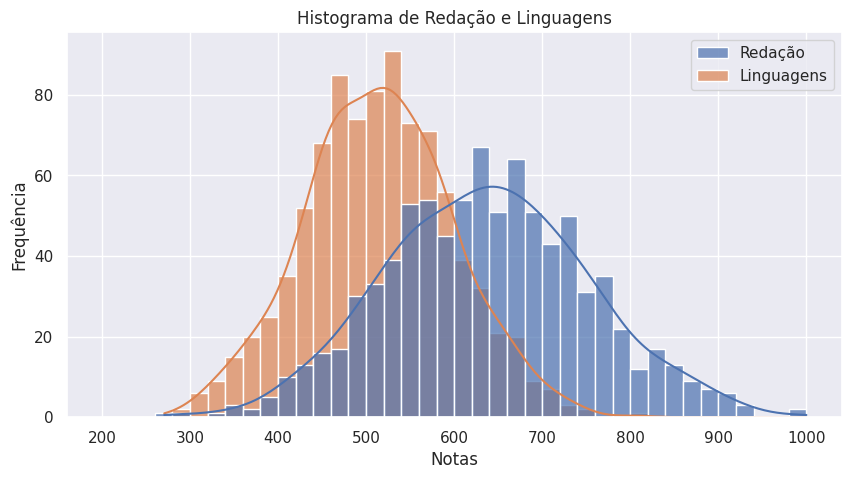

In [ ]:
#Criando um dataframe para redação e linguagens
df_red_lin = df_enem[['Redação', 'Linguagens']]

#Removendo os nulos
redacao = df_enem['Redação'].dropna()
linguagens = df_enem['Linguagens'].dropna()

#Configuração para juntar redação e linguagens em um gráfico só
bins_range = np.arange(200, 1001, 20)
sns.set_theme(style='darkgrid')
#plotando o grafico
plt.figure(figsize=(10, 5))
sns.histplot(data = df_red_lin, bins = bins_range, alpha = 0.7, kde = True)
plt.title('Histograma de Redação e Linguagens')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

Resposta: A distribuição das notas de Redação parece aproximadamente simétrica, pois a curva tem um formato parecido de ambos os lados da média. Já a distribuição de Linguagens parece assimétrica à esquerda, já que a cauda se estende mais para valores baixos.

## Exercicio 7
Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

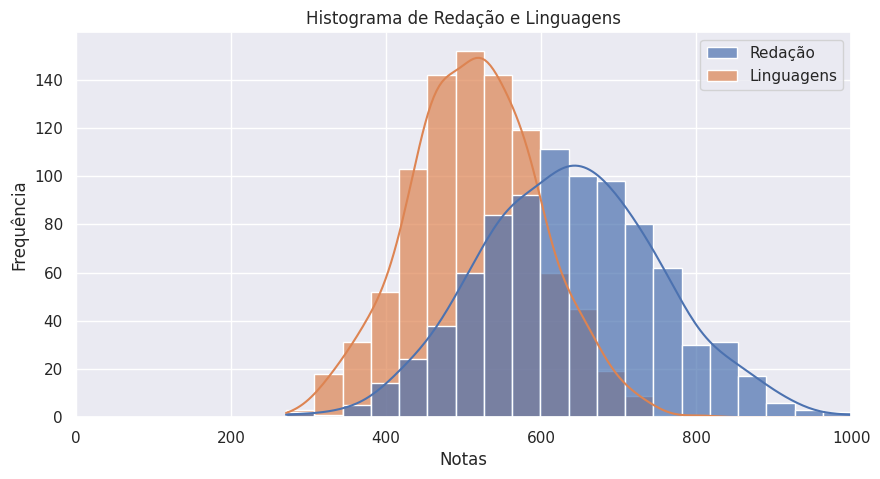

In [ ]:
sns.set_theme(style='darkgrid')
# plotando o grafico
plt.figure(figsize=(10, 5))
sns.histplot(data=df_red_lin, bins=20, alpha=0.7, kde=True)
plt.xlim(0, 1000)  # The xlim method is used to set the range on the x-axis
plt.title('Histograma de Redação e Linguagens')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

Resposta: Sim, pois independente do intervalo, os valores continuam concentrados na média com uma visão mais simétrica.

## Exercicio 8
Faça um boxplot para as notas de Ciências da Natureza e Redação,
analisando os quartis e identificando possíveis outliers. Utilize o método
IQR (Intervalo Interquartílico) para essa análise.


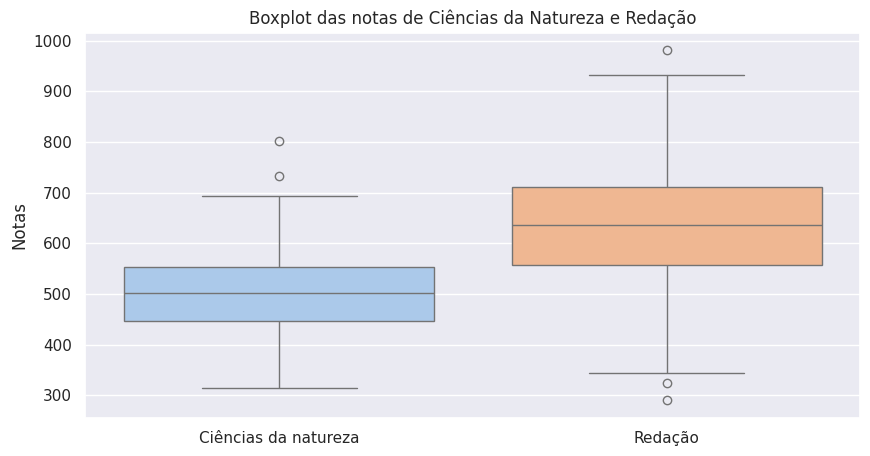

Disciplina: Ciências da natureza.
Número de outliers encontrado: 2.
IQR: 105.71203439857504.
Valor mínimo: 314.4.
Valor máximo: 802.0045683513.

Disciplina: Redação.
Número de outliers encontrado: 3.
IQR: 155.0016325121751.
Valor mínimo: 290.3086081677.
Valor máximo: 981.0165529826.



In [ ]:
# Remover valores nulos
df_quartil = df_enem[['Ciências da natureza', 'Redação']].dropna()

# boxplot
sns.set_theme()
plt.figure(figsize = (10, 5))
sns.boxplot(data = df_quartil, palette = 'pastel')
plt.title('Boxplot das notas de Ciências da Natureza e Redação')
plt.ylabel('Notas')
plt.show()
# Laço para cada disciplina
for col in df_quartil.columns:
    Q1 = df_quartil[col].quantile(0.25)
    Q3 = df_quartil[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificando outliers
    outliers = df_quartil[(df_quartil[col] < lower_bound) | (df_quartil[col] > upper_bound)][col]

    # Imprimindo resultados
    print(f'Disciplina: {col}.')
    print(f'Número de outliers encontrado: {outliers.count()}.')
    print(f'IQR: {IQR}.')
    print(f'Valor mínimo: {df_quartil[col].min()}.')
    print(f'Valor máximo: {df_quartil[col].max()}.\n')


## Exercicio 9
Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um valor
acima de 5%)

In [ ]:
# Remover valores nulos
df_quartil = df_enem[['Ciências da natureza', 'Redação']].dropna()

# Função para remover outliers
def remover_outliers_iqr(serie):
    Q1 = serie.quantile(0.25)
    Q3 = serie.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return serie[(serie >= limite_inferior) & (serie <= limite_superior)]

# Análise por disciplina
for col in df_quartil.columns:
    original = df_quartil[col]
    sem_outliers = remover_outliers_iqr(original)

    media_original = original.mean()
    media_sem_outliers = sem_outliers.mean()
    diferenca_percentual = ((media_sem_outliers - media_original) / media_original) * 100

    print(f'Disciplina: {col}')
    print(f'Média original: {media_original:.2f}')
    print(f'Média sem outliers: {media_sem_outliers:.2f}')
    print(f'Diferença percentual: {diferenca_percentual:.2f}%')
    if abs(diferenca_percentual) > 5:
        print('>>> Alteração significativa (>5%)\n')
    else:
        print('Sem alteração significativa.\n')

print ('\nConclusão: A diferença de valores é muito pequena, logo, não há alteração significativa')

Disciplina: Ciências da natureza
Média original: 501.82
Média sem outliers: 501.06
Diferença percentual: -0.15%
Sem alteração significativa.

Disciplina: Redação
Média original: 637.91
Média sem outliers: 638.37
Diferença percentual: 0.07%
Sem alteração significativa.


Conclusão: A diferença de valores é muito pequena, logo, não há alteração significativa


## Exercicio 10
Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou mediana?
Substitua o valor por todos os três e diga qual delas altera menos a média
geral e o desvio padrão.

In [ ]:
df_original = df_enem.select_dtypes(include = np.number)
# criando dicionario para comparação
comparacao = {}
for col in df_original.columns:
    original = df_original[col].dropna()

    media_original = original.mean()
    desvio_original = original.std()

    # Substituições
    media_sub = df_original[col].fillna(original.mean())
    mediana_sub = df_original[col].fillna(original.median())
    moda_valor = original.mode()[0] if not original.mode().empty else original.mean()
    moda_sub = df_original[col].fillna(moda_valor)

    # Cálculos
    resultados = {
        'média': {
            'média_final': media_sub.mean(),
            'desvio_final': media_sub.std()
        },
        'mediana': {
            'média_final': mediana_sub.mean(),
            'desvio_final': mediana_sub.std()
        },
        'moda': {
            'média_final': moda_sub.mean(),
            'desvio_final': moda_sub.std()
        }
    }

    # Avaliar qual tem menor diferença
    melhor_opcao = None
    menor_dif = float('inf')

    for metodo, stats in resultados.items():
        dif_media = abs(stats['média_final'] - media_original)
        dif_std = abs(stats['desvio_final'] - desvio_original)
        total_dif = dif_media + dif_std

        if total_dif < menor_dif:
            menor_dif = total_dif
            melhor_opcao = metodo

    # Guardar os dados
    comparacao[col] = {
        'média original': round(media_original, 2),
        'desvio original': round(desvio_original, 2),
        'melhor substituto': melhor_opcao,
        'diferença total': round(menor_dif, 4)
    }

# Mostrar os resultados
for disciplina, info in comparacao.items():
    print(f"Disciplina: {disciplina}")
    print(f"Média original: {info['média original']} | Desvio padrão: {info['desvio original']}")
    print(f"Melhor substituto: {info['melhor substituto']} (diferença total: {info['diferença total']})\n")

Disciplina: Linguagens
Média original: 514.52 | Desvio padrão: 84.01
Melhor substituto: média (diferença total: 4.4486)

Disciplina: Ciências humanas
Média original: 527.04 | Desvio padrão: 77.81
Melhor substituto: média (diferença total: 2.5337)

Disciplina: Ciências da natureza
Média original: 499.32 | Desvio padrão: 78.76
Melhor substituto: média (diferença total: 7.2737)

Disciplina: Matemática
Média original: 535.97 | Desvio padrão: 86.65
Melhor substituto: média (diferença total: 3.3611)

Disciplina: Redação
Média original: 637.78 | Desvio padrão: 115.34
Melhor substituto: média (diferença total: 8.3868)

